In [37]:
# The happiness score project
#Importing packages for analysis
import numpy as np
import pandas as pd
import geopandas
import random
import requests
from bs4 import BeautifulSoup as bs

#Importing packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
def dataset(csv):
    csv_data = pd.read_csv(csv) #Importing a csv file
    pd_data = pd.DataFrame(csv_data)#Creating a pandas dataframe
    return pd_data
file = "C:/Users/tadas/Desktop/Happiness Project/WorldHappiness_Corruption_2015_2020.csv" # Csv file location
happiness_data = dataset(file)
type(happiness_data)

pandas.core.frame.DataFrame

In [39]:
happiness_data.head(3)

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79


In [40]:
def cleaning_df(dataset):
    set_index = dataset.set_index('Country') # Setting Country column as index
    set_index.rename(index = {"United States": "United States of America"},inplace = True) #Changing the country's name for correct merging
    df = set_index.reset_index() #Resetting index
    df.columns = df.columns.str.lower() # Modifying column names into lowercase letters
    columns = list(df.columns.values) # List of column names
    columns.pop(columns.index('continent')) # Excluding column name 'continent'
    columns.pop(columns.index('year')) # Excluding column name 'year'
    columns.pop(columns.index('country')) # Excluding column name 'country'
    dataframe = df[['country','continent','year'] + columns] # Adjusting the dataframe with a custom order of columns
    return dataframe
happiness_df = cleaning_df(happiness_data)

In [41]:
happiness_df.head(3)

,country,continent,year,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,social_support,cpi_score
0,Norway,Europe,2015,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,0.0,88
1,Denmark,Europe,2015,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,0.0,91
2,Iceland,Europe,2015,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,0.0,79


In [42]:
happiness_df_cont_n_year = happiness_df.groupby(['continent','year'])[["happiness_score","gdp_per_capita"]].agg([min,max]) # Grouping with minimum and maximum
display(happiness_df_cont_n_year)

happiness_score         gdp_per_capita          
                               min     max            min       max
continent     year                                                 
Africa        2015          2.9050  5.8720       0.091623  1.198210
              2016          2.8390  5.7540       0.015300  1.131450
              2017          3.2310  5.8880       0.046000  1.120000
              2018          2.9050  5.8910       0.076000  1.090000
              2019          2.9050  6.3550       0.068310  1.158510
              2020          3.2992  6.1013       0.000000  1.073664
Asia          2015          3.5930  7.2130       0.367111  1.692278
              2016          3.5750  7.2780       0.271080  1.554220
              2017          3.2030  7.1390       0.287000  1.572000
              2018          3.3550  6.8140       0.332000  2.096000
              2019          3.3600  7.2670       0.341120  1.645550
              2020          2.5669  7.1286       0.300706  1.519580
Australia     2015          7.2840  7.3140       1.405706  1.484415
              2016          7.2840  7.2860       1.250180  1.333580
              2017          7.2280  7.3070       1.303000  1.372000
              2018          7.2720  7.3240       1.268000  1.340000
              2019          7.3130  7.3340       1.360660  1.444430
              2020          7.2228  7.2996       1.242318  1.310396
Europe        2015          4.0960  7.5370       0.728871  1.741944
              2016          4.2180  7.5870       0.594480  1.563910
              2017          4.3320  7.7690       0.685000  1.609000
              2018          4.1030  7.6320       0.657000  1.576000
              2019          4.2170  7.5260       0.691770  1.697520
              2020          4.5607  7.8087       0.707917  1.536676
North America 2015          6.5780  7.3160       1.153184  1.546259
              2016          7.1190  7.4270       1.020540  1.394510
              2017          6.5950  7.2780       1.070000  1.433000
              2018          6.4880  7.3280       1.038000  1.398000
              2019          6.7780  7.4040       1.115080  1.507960
              2020          6.4650  7.2321       1.024387  1.373987
South America 2015          3.5070  7.0790       0.244550  1.252785
              2016          3.6560  7.2260       0.174170  1.107150
              2017          3.5970  7.1670       0.323000  1.159000
              2018          3.5820  7.0720       0.315000  1.131000
              2019          3.6070  7.0870       0.224150  1.216700
              2020          3.7208  7.1214       0.284734  1.097668

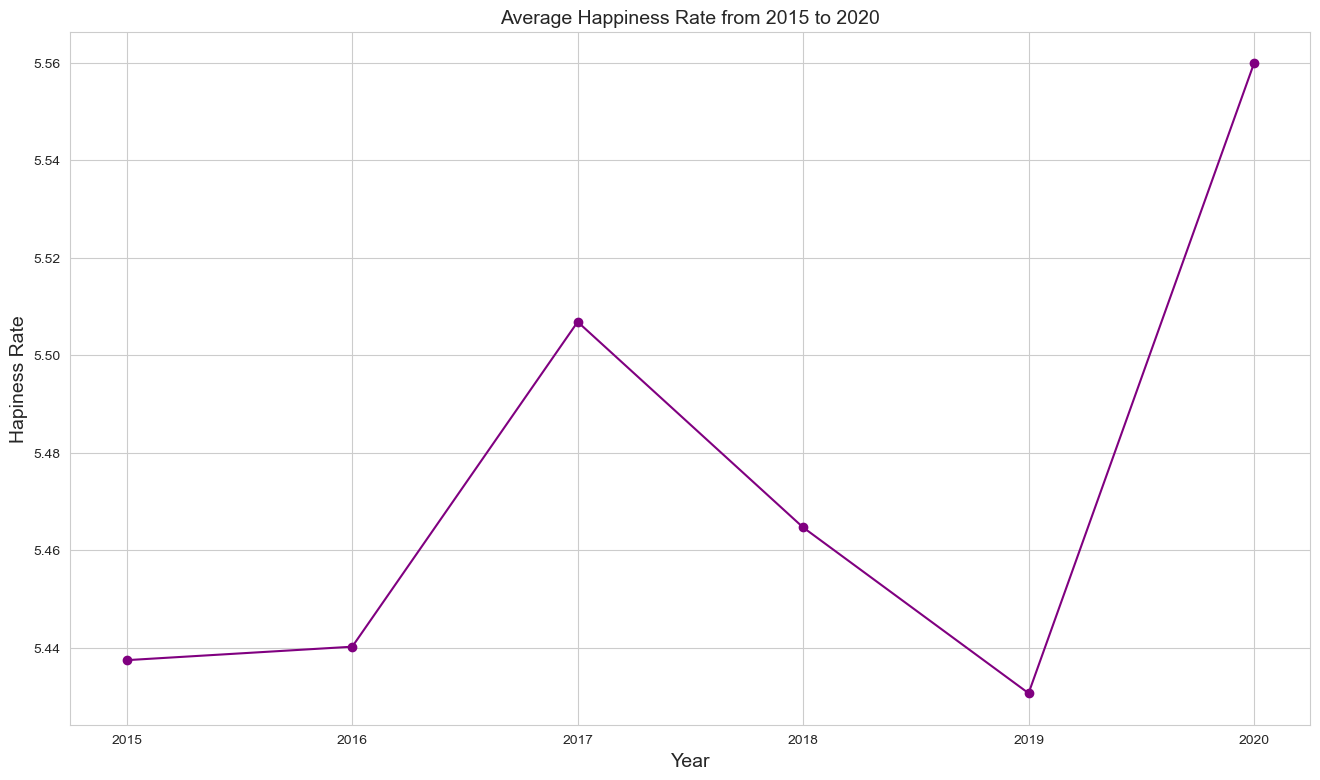

In [43]:
plt.plot(happiness_df.pivot_table(index =['year'], values =['happiness_score']), # Creating a plot of the happiness score from 2015 to 2020
         color='purple', marker='o')
plt.title('Average Happiness Rate from 2015 to 2020', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Hapiness Rate', fontsize=14)
plt.grid(True)
plt.show()

In [44]:
display(happiness_df.pivot_table(index =['year'], values =['happiness_score'])) # A pivot table of the happiness scores over the years

,happiness_score
year,
2015,5.437485
2016,5.440242
2017,5.506848
2018,5.464697
2019,5.430705
2020,5.559882


Text(0.5, 1.0, 'Happiness Score around continents of the world 2015 - 2020')

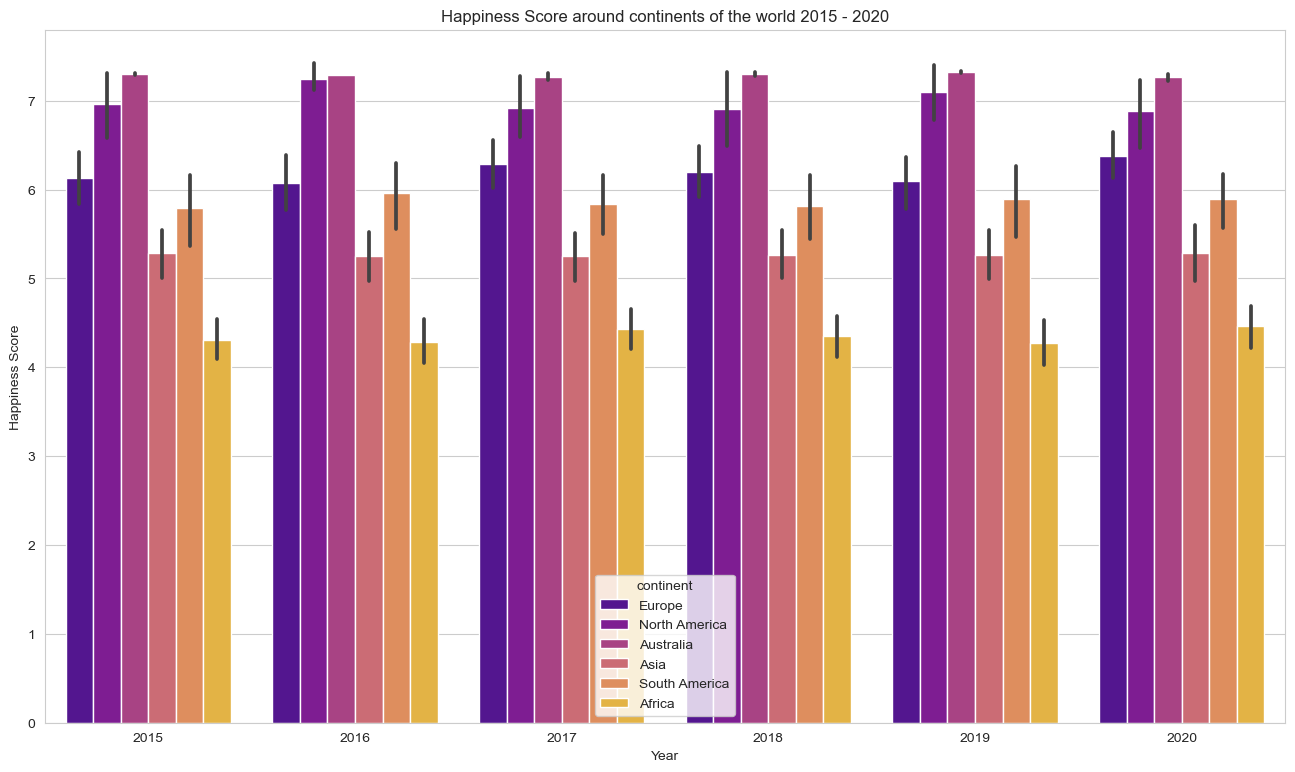

In [45]:
sns.barplot(data=happiness_df,y='happiness_score', x='year', hue='continent',palette='plasma') # Bar plot of the average happiness score across the continents
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Happiness Score around continents of the world 2015 - 2020')

In [46]:
happiness_df.groupby('continent')['happiness_score'].mean()  # Analysis of a bar plot

continent
Africa           4.353944
Asia             5.267553
Australia        7.289033
Europe           6.193717
North America    7.000539
South America    5.865516
Name: happiness_score, dtype: float64

In [47]:
df_2020 = happiness_df[happiness_df['year'] == 2020]  # Subsetting the dataframe by the year 2020

In [48]:
geo_world_map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres')) # Importing the world map as a dataframe
geo_world_map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [49]:
table = geo_world_map.merge(df_2020, how="left", left_on=['name'], right_on=['country']) # Merging two dataframes
table.drop_duplicates(subset = 'country') # Dropping the duplicates 
table.fillna(method = 'bfill', axis=1).fillna(0) # Filling the nil values
table.head(3)

,pop_est,continent_x,name,iso_a3,gdp_md_est,geometry,country,continent_y,year,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,social_support,cpi_score
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,Africa,2020.0,3.4762,0.457163,0.0,0.442678,0.509343,0.271541,0.203881,0.718963,0.872675,38.0
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
type(table)

geopandas.geodataframe.GeoDataFrame

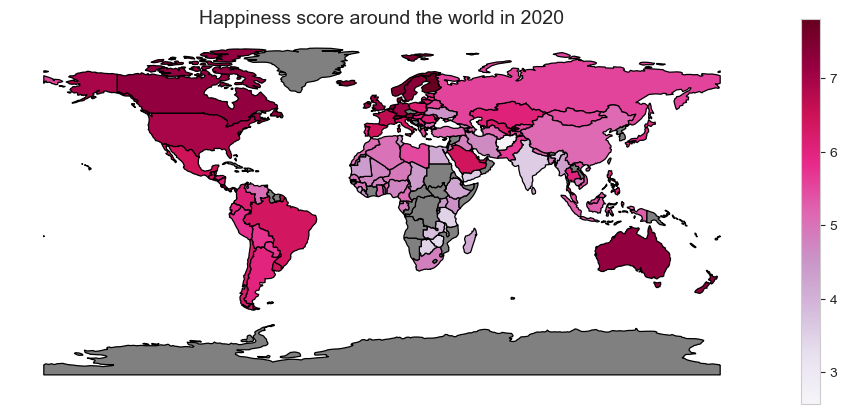

In [51]:
def map_plot(world): # Plotting the world map and including the happiness scores
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(1, figsize=(12, 5))
    ax.axis('off')
    ax.set_title('Happiness score around the world in 2020', fontdict={'fontsize': '14', 'fontweight' : '4'})
    world.plot(column='happiness_score',
            cmap='PuRd',
            linewidth=0.9,
            ax=ax,
            edgecolor='0',
            legend=True, missing_kwds={
            "color": "grey",
            "label": "N/A",},)
map_plot(table)

Text(0.5, 1.0, 'Relationships between various factors 2015 - 2020')

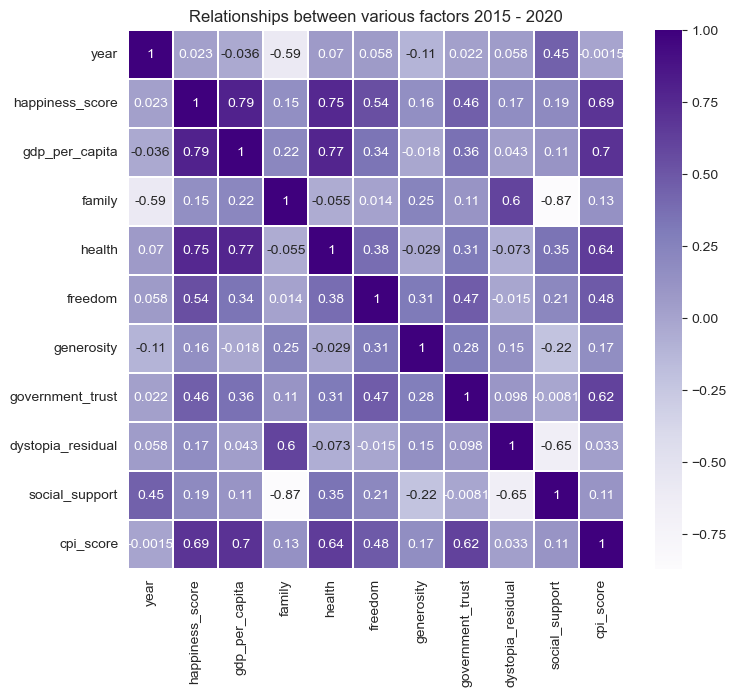

In [52]:
correlation = happiness_df.corr() # Heat map 
  
f, ax = plt.subplots(figsize =(8, 7))
sns.heatmap(correlation, annot = True, ax = ax, cmap ="Purples", linewidths = 0.1)
plt.title('Relationships between various factors 2015 - 2020')

In [53]:
numbers = [] # Looping the numbers and creating a list
for x in np.arange(0, 1.2, 0.15):
    print(x)
    numbers.append(x)

0.0
0.15
0.3
0.44999999999999996
0.6
0.75
0.8999999999999999
1.05


In [54]:
type(numbers)

list

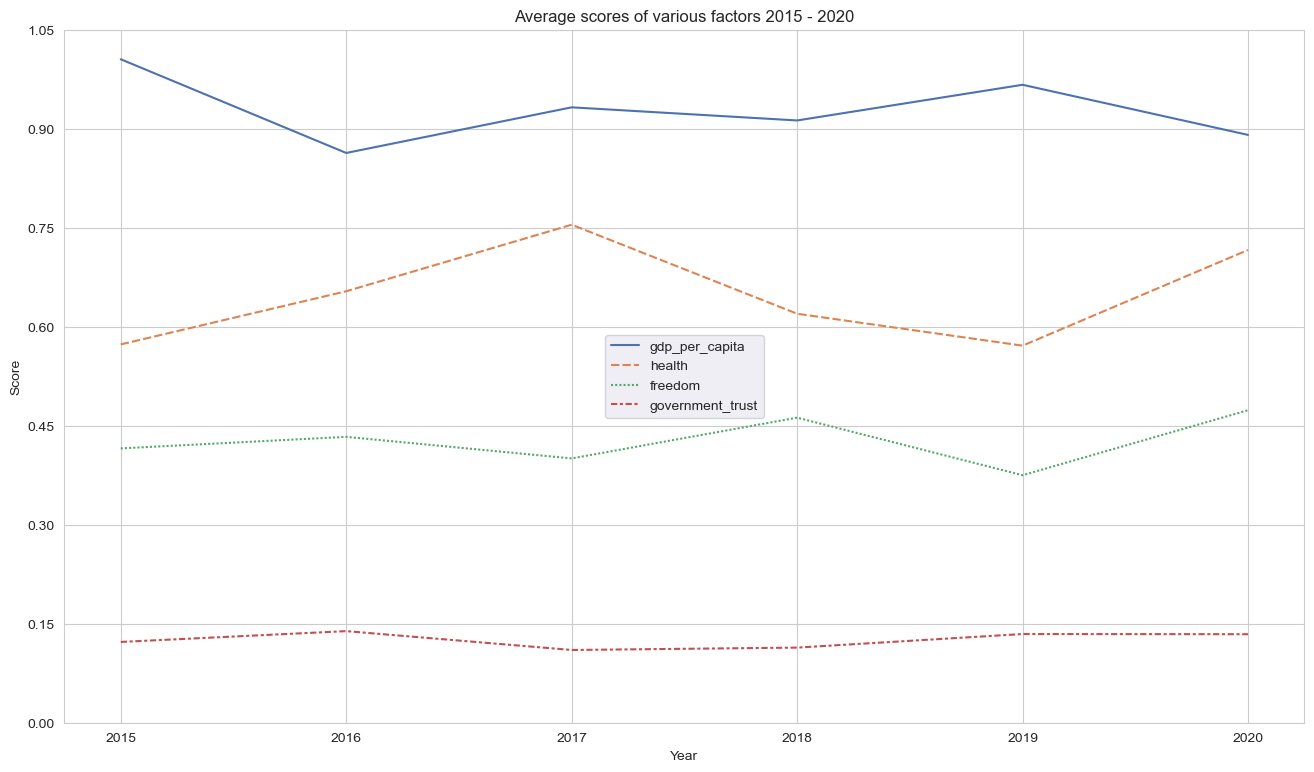

In [55]:
def line_plot(group): # Creating the graph with custom ticks
    sns.lineplot(data = group)
    sns.set({"figure.figsize":(16, 9)})
    plt.xlabel('Year')
    plt.ylabel('Score')
    plt.title('Average scores of various factors 2015 - 2020')
    plt.yticks(numbers)
    plt.legend()
    plt.show()
group1 = happiness_df.groupby('year')[['gdp_per_capita','health','freedom','government_trust']].mean().round(4)
line_plot(group1)

In [56]:
group1

,gdp_per_capita,health,freedom,government_trust
year,,,,
2015,1.0061,0.5737,0.4160,0.1225
2016,0.8640,0.6543,0.4335,0.1389
2017,0.9332,0.7552,0.4008,0.1103
2018,0.9133,0.6202,0.4626,0.1139
2019,0.9674,0.5718,0.3753,0.1345
2020,0.8914,0.7169,0.4739,0.1342


In [57]:
def happiness_table(web):
    webpage = requests.get(web) # Retrieving data from a web page
    soup = bs(webpage.content, 'lxml') # Pulling out data using Beautiful Soup
    table = soup.find("table") # Finding a table
    df_table = pd.read_html(str(table))[0] # Creating a data frame from the Beautiful Soup table
    return df_table
url = 'https://worldpopulace.com/happiest-countries-in-the-world/'
url22 = 'https://www.atlasandboots.com/travel-blog/happiest-countries-in-the-world-ranked/'
hs_2021 = happiness_table(url) # Happiness scores 2021 in pandas dataframe type
hs_2022 = happiness_table(url22) # Happiness scores 2022 in pandas dataframe type

In [58]:
def cleaning_df21(df_2021): # Modifying 2021 dataframe
    hs_data_21 = df_2021.assign(year = 2021).drop(columns = ['Rank','Happiness 2020','2022 Population']).rename(columns = {'Happiness 2021':'happiness_score','Country':'country'})
    return hs_data_21
hs_21 = cleaning_df21(hs_2021)

def cleaning_df22(df_2022): # Modifying 2022 dataframe
    df_2022.columns = ['Rank','country','happiness_score']
    data_22 = df_2022.drop(columns = ['Rank'])
    df_22 = data_22.drop(data_22.index[[0]]).assign(year = 2022)
    return df_22
hs_22 = cleaning_df22(hs_2022)

def new_df(dataframe): #  Adjusting the country name in the 2021 dataframe to match the 2015-2020 dataframe
    df_index = dataframe.set_index('country')
    df_index.rename(index = {"United States": "United States of America"},inplace = True)
    adj_df = df_index.reset_index()
    return adj_df
hs21 = new_df(hs_21)

def new_df_22(data):  # Changing the country names and deleting the countries with not yet updated happiness scores
    df_idx = data.set_index('country')
    df_idx.rename(index = {'USA': 'United States of America','UK':'United Kingdom','UAE':'United Arab Emirates','Bosnia and Herz.':'Bosnia and Herzegovina','Ukraine**':'Ukraine'},inplace = True)
    df22 = df_idx.drop(['Luxembourg*','Guatemala*','Kuwait*','Belarus*','Turkmenistan*','North Cyprus*','Hong Kong (SAR)','Libya*','Azerbaijan*','Gambia*','Liberia*','Niger*','Comoros*','Palestinian Territories*','Eswatini (Swaziland)*','Madagascar*','Chad*','Yemen*','Mauritania*','Lesotho*','Botswana*','Rwanda*'])
    adj_df_22 = df22.reset_index()
    return adj_df_22
hs22 = new_df_22(hs_22)

In [59]:
hs_15_20 = happiness_df[['country','happiness_score','year']] # Subsetting the dataframe
hs_15_22 = pd.concat([hs_15_20, hs21, hs22]) # Concatenating all dataframes to one

In [60]:
hs_15_22

,country,happiness_score,year
0,Norway,7.537,2015
1,Denmark,7.522,2015
2,Iceland,7.504,2015
3,Switzerland,7.494,2015
4,Finland,7.469,2015
...,...,...,...
119,Tanzania,3.702,2022
120,Sierra Leone,3.574,2022
121,Zimbabwe,2.995,2022
122,Lebanon,2.955,2022


In [61]:
def top_countries(data,year):  # Sorting the countries with the highest happiness scores each year
    top = data[data['year'] == year].sort_values('happiness_score', ascending=False).head(3)
    return top    
display(top_countries(hs_15_22,2015),top_countries(hs_15_22,2016),top_countries(hs_15_22,2017),top_countries(hs_15_22,2018),top_countries(hs_15_22,2019),top_countries(hs_15_22,2020),top_countries(hs_15_22,2021),top_countries(hs_15_22,2022))

,country,happiness_score,year
0,Norway,7.537,2015
1,Denmark,7.522,2015
2,Iceland,7.504,2015


,country,happiness_score,year
132,Switzerland,7.587,2016
133,Iceland,7.561,2016
134,Denmark,7.527,2016


,country,happiness_score,year
264,Finland,7.769,2017
265,Denmark,7.6,2017
266,Norway,7.554,2017


,country,happiness_score,year
396,Finland,7.632,2018
397,Norway,7.594,2018
398,Denmark,7.555,2018


,country,happiness_score,year
528,Denmark,7.526,2019
529,Switzerland,7.509,2019
530,Iceland,7.501,2019


,country,happiness_score,year
660,Finland,7.8087,2020
661,Denmark,7.6456,2020
662,Switzerland,7.5599,2020


,country,happiness_score,year
0,Finland,7.842,2021
1,Denmark,7.62,2021
2,Switzerland,7.571,2021


,country,happiness_score,year
0,Finland,7.821,2022
1,Denmark,7.636,2022
2,Iceland,7.557,2022


In [62]:
display(hs_15_22[hs_15_22['country'] == 'Ireland'])  # Reviewing Ireland's happiness score for each year

,country,happiness_score,year
14,Ireland,6.977,2015
149,Ireland,6.94,2016
279,Ireland,7.021,2017
409,Ireland,6.977,2018
545,Ireland,6.907,2019
675,Ireland,7.0937,2020
14,Ireland,7.085,2021
11,Ireland,7.041,2022


In [63]:
def prep(dfs):
    final_hs_22 = dfs.astype({'happiness_score':float})  # Changing values of the happiness score to floats
    final_pivot = final_hs_22.pivot_table(values='happiness_score',index= 'year') # Creating a pivot table
    final = final_pivot.reset_index() # Including an index on the pivot table
    return final
final_hs = prep(hs_15_22)

In [64]:
final_hs

,year,happiness_score
0,2015,5.437485
1,2016,5.440242
2,2017,5.506848
3,2018,5.464697
4,2019,5.430705
5,2020,5.559882
6,2021,5.534027
7,2022,5.664452


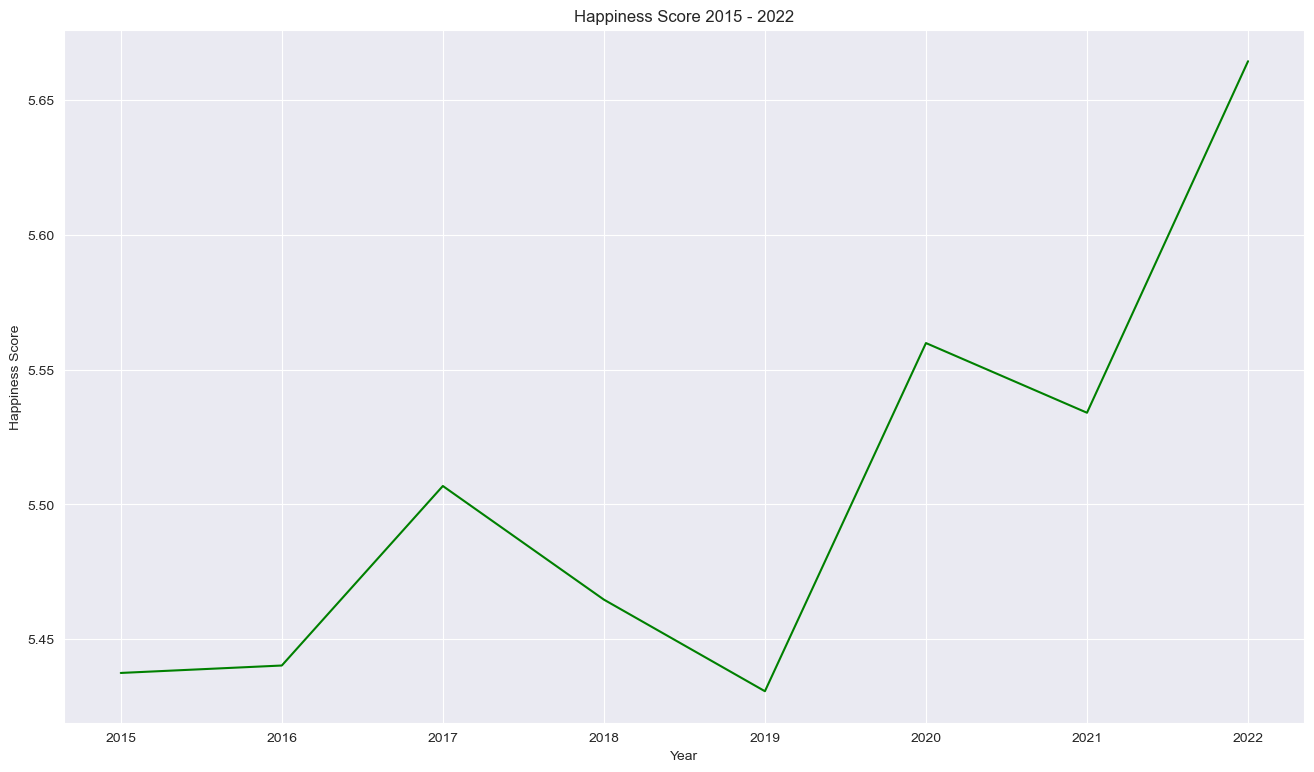

In [65]:
sns.lineplot(data=final_hs, x="year", y="happiness_score", color='Green', markers=True)  # Plotting a graph of the average happiness score 2015 - 2022
sns.set({"figure.figsize":(16, 9)})
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Happiness Score 2015 - 2022')
plt.show()

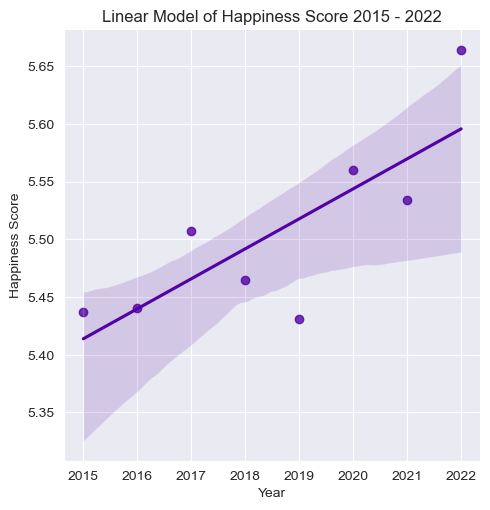

In [66]:
def line_model(finaldfs):  # Creating a linear regression model for the average happiness score over the years
    sns.set_palette("plasma")
    sns.lmplot(x="year",y="happiness_score", data=finaldfs)
    sns.set({"figure.figsize":(16, 9)})
    plt.xlabel('Year')
    plt.ylabel('Happiness Score')
    plt.title('Linear Model of Happiness Score 2015 - 2022')
    plt.show()
line_model(final_hs)